In [60]:
from sklearn.datasets import fetch_openml # its a popular dataset 
mnist = fetch_openml('mnist_784',version =1) # this one i mean its about handwriting of numbers and all that"
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [16]:
y.shape

(70000,)

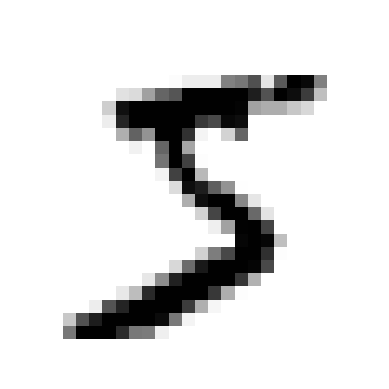

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt 


some_digit = X.iloc[0] #here we cant do X[0] as that calls a row named '0" tho we need the first row so instead we call suing iloc
some_digit_image = some_digit.values.reshape(28, 28) # now prev line of code returned a series and we need to reshape it so we use values.reshape

plt.imshow(some_digit_image,cmap= "binary") # THIS imshow() is a helpful feature in displaying such
plt.axis("off")
plt.show()

In [22]:
y[0]

'5'

In [40]:
#label is a string as above shown we will cast it to integer
import numpy as np
y = y.astype(np.uint8)

In [44]:
# time to create a test set for inspecting data

# now the dataset mnist given to us is already 70k and split into trainign(first 60k) and test set (remaining 10k)

X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [50]:
# FIRST LETS BUILD A 5-DETECTOR (BINARY CLASSIFIER) - 5 and not 5


y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [52]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [54]:
sgd_clf.predict([some_digit])

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")# cv = 3 ka matlab 3 cross fld validations and so it returns 3 ka arrahy 

array([0.95035, 0.96035, 0.9604 ])

In [64]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [66]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5,cv=3,scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])